# 1. Análisis Exploratorio de Datos Inicial: Impacto Normativo en Procesos Organizacionales

Este análisis exploratorio de datos (EDA) tiene como objetivo comprender las dimensiones preliminares del impacto normativo sobre la organización, a partir de dos fuentes entregadas por el equipo de negocio en una etapa temprana del proyecto: una matriz de impactos de normativas y una matriz de procesos en construcción. Estas fuentes permiten identificar áreas afectadas, niveles de impacto y probabilidad, así como procesos y subprocesos vinculados a regulaciones específicas. Este EDA busca caracterizar el mapa de procesos y la futura integración semántica entre normativas, responsabilidades funcionales y trazabilidad operativa.

**Trabajo previo:** Como las fuentes de datos no tienen una estructuración sistematizada, fue necesario realizar un preprocesamiento manual

## 1.1 EDA de la Matriz de Impacto 
La matriz de impacto entregada por el negocio tiene como propósito identificar, clasificar y documentar cómo ciertas normativas afectan distintas áreas, procesos y subprocesos de la organización. Esta herramienta permite anticipar riesgos regulatorios, asignar responsables funcionales y establecer niveles de impacto y probabilidad, facilitando una trazabilidad normativa operativa desde el inicio del diseño del sistema de cumplimiento automatizado.


In [105]:
# library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [106]:
# -------------------------------
# CONSTANTS
# -------------------------------
DATA_DIR = "./../raw_data"
INPUT_MATRIZ_IMPACTO = "matriz_impactos.xlsx"
INPUT_MATRIZ_PROCESOS = "matriz_procesos.xlsx"
CUSTOM_PALETTE = [
    "#677023",  # Olive Green
    "#F3A7CC",  # Bubblegum Pink
    "#5B6E86",  # Steel Blue
    "#FF5C73",  # Hot Coral
    "#B2A2D6",  # Cool Lilac
    "#DBFF00",  # Neon Lime
    "#FFB300",  # Golden Yellow
    "#212121",  # Deep Charcoal
    "#FEF9ED",  # Light Pink
    "#B4FF00",  # Lime Boots
    "#F9DA00",  # Yellow Suit
    "#DAB9CE",  # Mauve Shadow
    "#FFEDD6",  # Peach Cloud
    "#3D8B84",  # Deep Teal
    "#D1B660"   # Golden Moon
]

In [107]:
df = pd.read_excel(f"{DATA_DIR}/{INPUT_MATRIZ_IMPACTO}")

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Mostrar las columnas disponibles para depurar errores
print("Columnas disponibles en el archivo:")
print(df.columns.tolist())


Columnas disponibles en el archivo:
['n°', 'país', 'identificación_de_la_norma', 'descripción_de_la_normativa', 'nivel_de_obligatoriedad', 'entrada_en_vigencia', 'área_afectada', 'descripción_del_impacto', 'nivel_del_impacto', 'nivel_de_probabilidad', 'medida_propuesta_inmediata', 'medida_propuesta_a_lp', 'responsable']


In [108]:
df

,n°,país,identificación_de_la_norma,descripción_de_la_normativa,nivel_de_obligatoriedad,entrada_en_vigencia,área_afectada,descripción_del_impacto,nivel_del_impacto,nivel_de_probabilidad,medida_propuesta_inmediata,medida_propuesta_a_lp,responsable
0,1.1,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,Incumplimiento de la obligación de inicio de a...,Obligatorio,2025-04-24,"Gerencia de Finanzas, Administración y Personas",Comunicación oportuna de los cambios corporati...,Alto,Media,NaN,NaN,NaN
1,1.1,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,Incumplimiento de la obligación de inicio de a...,Obligatorio,2025-04-24,Fiscalía,Comunicación oportuna de los cambios corporati...,Alto,Media,NaN,NaN,NaN
2,1.1,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,Incumplimiento de la obligación de inicio de a...,Obligatorio,2025-04-24,Gerencia Comercial,Conscientizar y promover el cumplimiento tribu...,Bajo,Bajo,NaN,NaN,NaN
3,1.2,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,"Los administradores, operadores o proveedores ...",Obligatorio,2025-04-24,"Gerencia Riesgos, Compliance y Ciberseguridad",Proceso de KYC: Exigencia del envío del certif...,Alto,Alto,NaN,NaN,NaN
4,1.2,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,Deberán exigir también que las personas o enti...,Obligatorio,2025-04-24,Gerencia Comercial,Conscientizar y promover el cumplimiento tribu...,Alto,Alto,NaN,NaN,NaN
5,1.2,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,"Deberán informar al SII de forma anual, en la ...",Obligatorio,2025-04-24,Fiscalía,Términos y condiciones - preguntas frecuentes,Medio,Media,NaN,NaN,NaN
6,1.2,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,"También deberá infromar, a solicitud del SII, ...",Obligatorio,2025-04-24,Gerencia Operaciones,Capacitación de ejecutivos de soporte y segments,Alto,Alto,NaN,NaN,NaN
7,1.2,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,"También deberá infromar, a solicitud del SII, ...",Obligatorio,2025-04-24,Gerencia Comercial,Capacitación de ejecutivos de soporte y segments,Alto,Alto,NaN,NaN,NaN
8,1.2,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,"También deberá infromar, a solicitud del SII, ...",Obligatorio,2025-04-24,Gerencia TI y Operaciones,Envío de información al SII,Alto,Alto,NaN,NaN,NaN
9,1.2,CH,Art. 68 CT - Ley N° 21.713 de cumplimiento tri...,"También deberá infromar, a solicitud del SII, ...",Obligatorio,2025-04-24,Gerencia TI y Operaciones,Posibles cambios en onboarding,Medio,Media,NaN,NaN,NaN


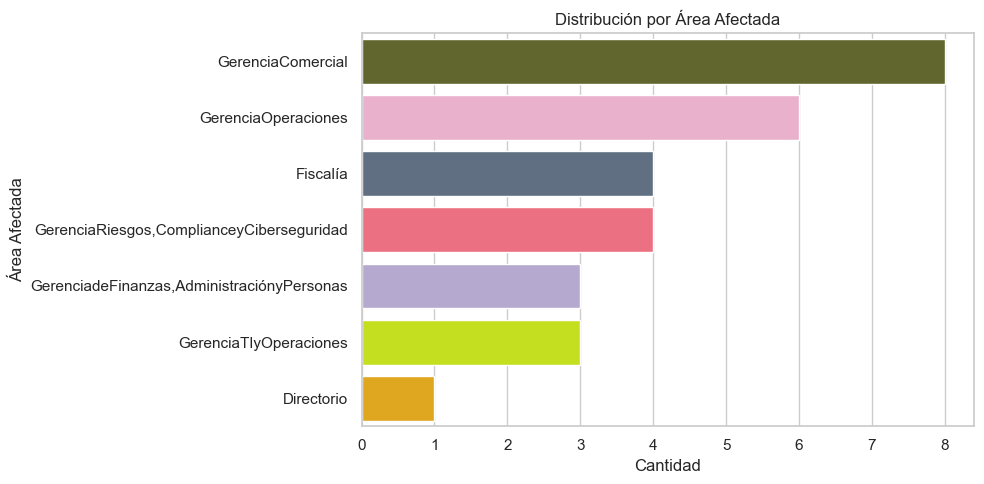

In [109]:
df["área_afectada"] = df["área_afectada"].str.strip().str.replace(" ", "")
# ================================
# 3. Gráfico: Áreas más afectadas
# ================================
plt.figure(figsize=(10, 5))
sns.countplot(
    y="área_afectada", 
    data=df, 
    order=df["área_afectada"].value_counts().index,
    palette=CUSTOM_PALETTE
)
plt.title("Distribución por Área Afectada")
plt.xlabel("Cantidad")
plt.ylabel("Área Afectada")
plt.tight_layout()
plt.show()


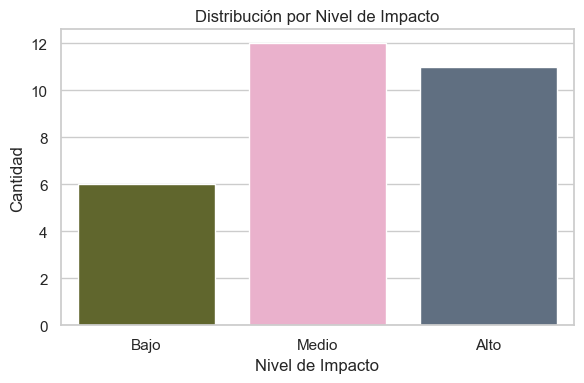

In [110]:

# ==================================
# 4. Gráfico: Niveles de Impacto
# ==================================
# Validar nombre de columna
if 'nivel_del_impacto' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(
        x="nivel_del_impacto", 
        data=df, 
        order=["Bajo", "Medio", "Alto"], 
        palette=CUSTOM_PALETTE
    )
    plt.title("Distribución por Nivel de Impacto")
    plt.xlabel("Nivel de Impacto")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Columna 'nivel_del_impacto' no encontrada.")



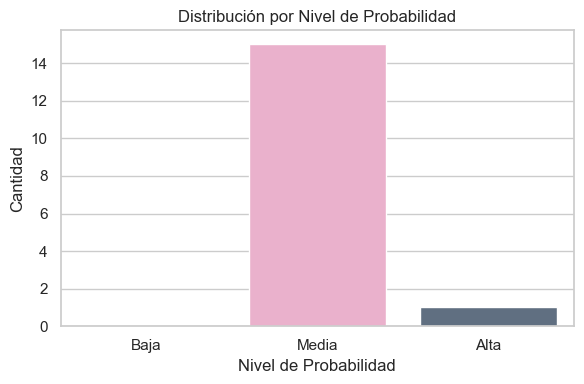

In [111]:
# =========================================
# 5. Gráfico: Nivel de Probabilidad
# =========================================
if 'nivel_de_probabilidad' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(
        x="nivel_de_probabilidad", 
        data=df, 
        order=["Baja", "Media", "Alta"], 
        palette=CUSTOM_PALETTE
    )
    plt.title("Distribución por Nivel de Probabilidad")
    plt.xlabel("Nivel de Probabilidad")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Columna 'nivel_de_probabilidad' no encontrada.")

## 2. EDA de la Matriz de Procesos

La **Matriz de Procesos** estructura jerárquicamente las actividades del negocio (de N1 a N5), permitiendo mapear el impacto de normativas sobre áreas, procesos y subprocesos. Es clave para alinear cumplimiento normativo con operaciones, facilitando trazabilidad, asignación de responsables y entrenamiento de agentes de IA.
El análisis exploratorio revela patrones estructurales como:

- Distribución de procesos por área.
- Profundidad jerárquica (N2 a N5).
- Procesos más frecuentes o críticos.

Esto orienta decisiones sobre automatización, gobernanza y priorización en fases tempranas del sistema de cumplimiento normativo.


Descripción general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tipo                     1088 non-null   object
 1   Responsable Cargo Dueño  1088 non-null   object
 2   Eslabon - Proceso (N1)   1088 non-null   object
 3   Proceso/Actividad N2     1088 non-null   object
 4   Proceso/Actividad N3     1057 non-null   object
 5   Proceso/Actividad N4     720 non-null    object
 6   Proceso/Actividad N5     162 non-null    object
dtypes: object(7)
memory usage: 59.6+ KB
None


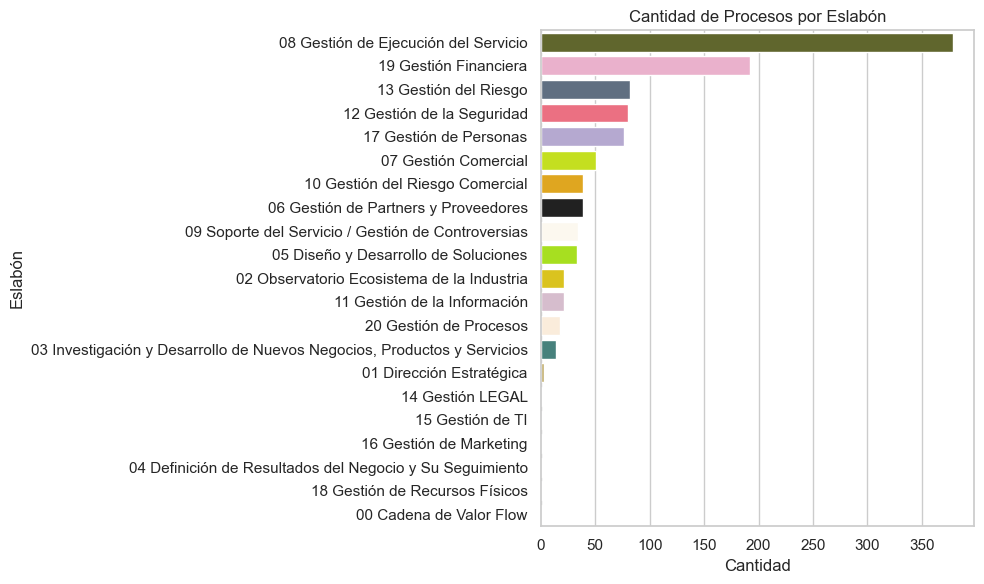

In [112]:

# Cargar la planilla de procesos
procesos_df = pd.read_excel(f"{DATA_DIR}/{INPUT_MATRIZ_PROCESOS}")


# Estilo gráfico
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=CUSTOM_PALETTE)

# Descripción del dataset
print("Descripción general del dataset:")
print(procesos_df.info())

# --- GRÁFICO 1: Cantidad de Procesos por Eslabón ---
plt.figure(figsize=(10, 6))
sns.countplot(
    data=procesos_df,
    y="Eslabon - Proceso (N1)",
    order=procesos_df["Eslabon - Proceso (N1)"].value_counts().index,
    palette=CUSTOM_PALETTE[:len(procesos_df["Eslabon - Proceso (N1)"].value_counts())]  # Ajustar paleta al número de eslabones
)
plt.title("Cantidad de Procesos por Eslabón")
plt.xlabel("Cantidad")
plt.ylabel("Eslabón")
plt.tight_layout()
plt.show()




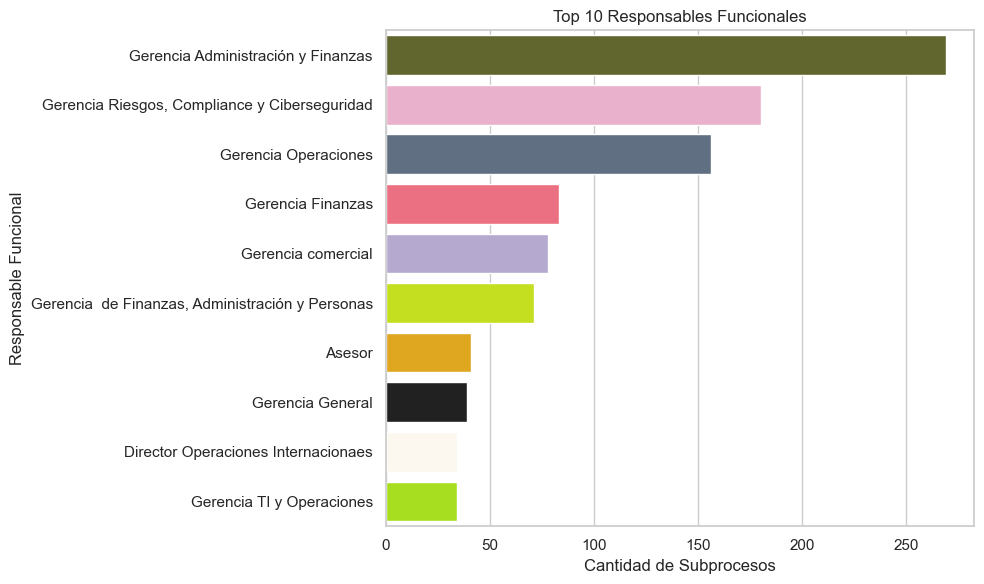

In [113]:
# --- GRÁFICO 2: Top 10 Responsables Funcionales ---
procesos_df["Responsable Cargo Dueño"] = procesos_df["Responsable Cargo Dueño"].fillna("No Asignado")
top_responsables = procesos_df["Responsable Cargo Dueño"].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_responsables.values, y=top_responsables.index, palette=CUSTOM_PALETTE[:len(top_responsables)])
plt.title("Top 10 Responsables Funcionales")
plt.xlabel("Cantidad de Subprocesos")
plt.ylabel("Responsable Funcional")
plt.tight_layout()
plt.show()

## 3. EDA Análisis Cruzado Impacto Procesos (Preliminar)
En esta primera instancia, no fue posible realizar un análisis exploratorio cruzado entre la **Matriz de Impacto Normativo** y la **Matriz de Procesos**, ya que ambas fuentes presentan estructuras de datos que no fueron diseñadas originalmente para facilitar un vínculo directo entre conceptos normativos y jerarquías procesales.

Actualmente, no existe un campo común que permita una fusión explícita o relacional. Sin embargo, se proyecta que mediante técnicas de **Procesamiento de Lenguaje Natural (PLN)** integradas en el **Agente Prescriptor Normativo**, será posible identificar correspondencias semánticas entre la descripción de las normativas y los procesos afectados. Esto abrirá la puerta a un match contextual que habilite análisis cruzados futuros con mayor granularidad y trazabilidad.